In [1]:
import numpy as np
import pandas as pd
import time as t
from scipy.optimize import minimize
from matplotlib import pyplot as plt
from scipy import special as sp
import SeqMC as smc

In [38]:
DF = pd.read_csv('tgsim.ascii', sep = '\t', names = ['y'])
y_dat_s = np.array(DF['y'])
#y_dat_s = np.repeat(3, 100)

1) INFERENCE ABOUT Xs

In [39]:
Es, Vars, res_count = smc.sequential_MC(y_dat_s, 100000)

End, resample performed 129 times


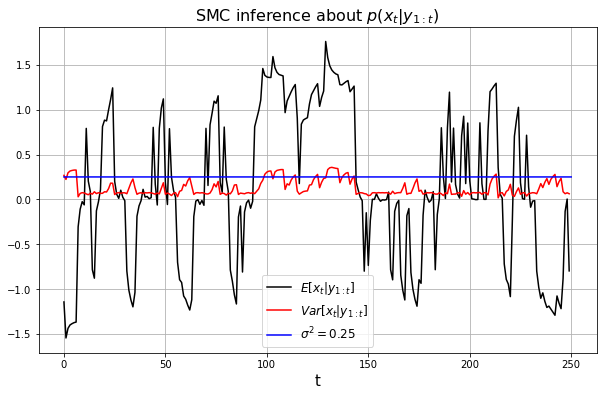

In [64]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y_dat_s[1:])), Es, label = '$E[x_t|y_{1:t}]$', color='black')
plt.plot(range(len(y_dat_s[1:])), Vars, label = '$Var[x_t|y_{1:t}]$', color='red')
plt.plot(np.linspace(0, len(y_dat_s[1:]), 10000), np.repeat(0.25, 10000), label = '$\sigma^2 = 0.25$', color='blue')
plt.xlabel('t', size=15)
plt.legend(fontsize=12)
plt.title('SMC inference about '+'$p(x_t|y_{1:t})$', size = 16)
plt.grid()
plt.savefig('Hmm_MC.pdf')

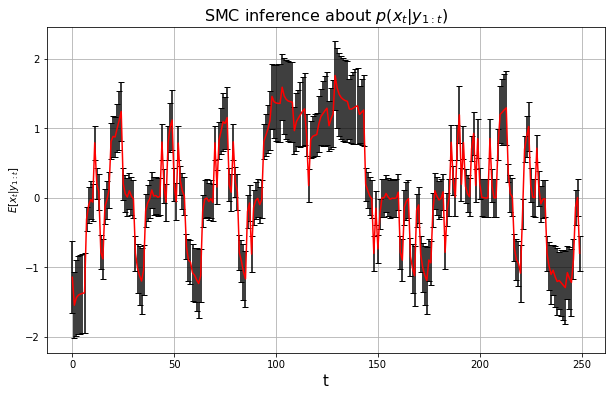

In [41]:
plt.figure(figsize=(10,6))
plt.errorbar(range(len(y_dat_s[1:])), Es, yerr = np.sqrt(Vars), capsize = 3, color = 'red', ecolor='black')
plt.ylabel('$E[x_t|y_{1:t}]$')
plt.xlabel('t', size=15)
plt.title('SMC inference about '+'$p(x_t|y_{1:t})$', size = 16)
plt.grid()

2) INFERENCE ABOUT THE PARAMETER a

In [80]:
E_a_s, Var_a_s, res_count = smc.sequential_MC_a(y_dat_s, 100000)

End, resample performed 136 times


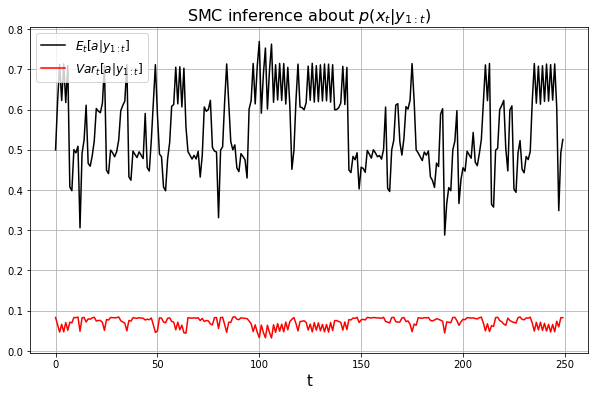

In [81]:
plt.figure(figsize=(10,6))
plt.plot(range(len(y_dat_s[1:])), E_a_s, label = '$E_t[a|y_{1:t}]$', color='black')
plt.plot(range(len(y_dat_s[1:])), Var_a_s, label = '$Var_t[a|y_{1:t}]$', color='red')
#plt.plot(np.linspace(0, len(y_dat_s[1:]), 10000), np.repeat(0.85, 10000), label = '$a = 0.85$', color='blue')
plt.xlabel('t', size=15)
plt.legend(fontsize=12)
plt.title('SMC inference about '+'$p(x_t|y_{1:t})$', size = 16)
plt.grid()
plt.savefig('Hmm_MC_a.pdf')

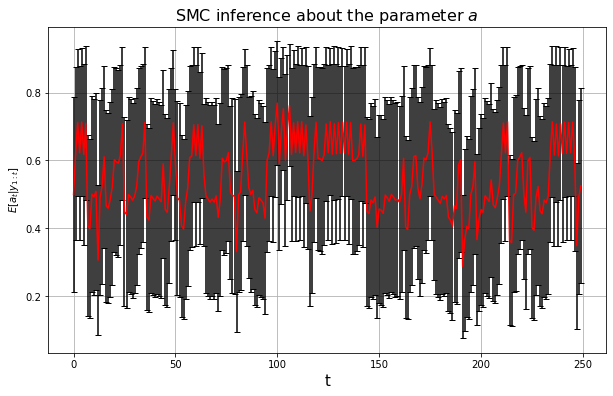

In [82]:
plt.figure(figsize=(10,6))
plt.errorbar(range(len(y_dat_s[1:])), E_a_s, yerr = np.sqrt(Var_a_s), capsize = 3, color = 'red', ecolor='black')
plt.ylabel('$E[a_t|y_{1:t}]$')
plt.xlabel('t', size=15)
plt.title('SMC inference about the parameter $a$', size = 16)
plt.grid()
plt.savefig('Hmm_errorbar_a.pdf')